In [4]:
import numpy as np
import matplotlib.pyplot as plt
from exp.SVI import SVI
from exp.SVI_CV import SVI_CV
from exp.SVI_Joint_CV import SVI_Joint_CV

%load_ext autoreload
%autoreload 2

## Logistic regression on Sonar

In [33]:
num_iters = 5000
step_size = 1e-4
batch_size = 5

In [34]:
# Naive estimator
runner = SVI(
    model_dir='models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, losses, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, opt='sgd')

# CV estimator
runner = SVI_CV(
    model_dir='models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, lossesCV, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, opt='sgd')

In [35]:
# JointCV estimator
runner = SVI_Joint_CV(
    model_dir='models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, lossesJointCV, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, alpha_decay=True, opt='sgd')

0.9978261
0.9956522
0.9934783
0.9913044
0.9891305
0.9869566
0.9847827
0.9826088
0.9804349
0.978261
0.9760871
0.9739132
0.9717393
0.9695654
0.9673915
0.9652176
0.9630437
0.9608698
0.9586959
0.956522
0.9543481
0.9521742
0.9500003
0.9478264
0.9456525
0.9434786
0.9413047
0.9391308
0.9369569
0.934783
0.9326091
0.9304352
0.9282613
0.9260874
0.9239135
0.9217396
0.9195657
0.9173918
0.9152179
0.913044
0.9108701
0.9086962
0.9065223
0.9043484
0.9021745
0.9000006
0.8978267
0.8956528
0.8934789
0.89130497
0.88913107
0.88695717
0.88478327
0.88260937
0.88043547
0.87826157
0.87608767
0.87391376
0.87173986
0.86956596
0.86739206
0.86521816
0.86304426
0.86087036
0.85869646
0.85652256
0.85434866
0.85217476
0.85000086
0.84782696
0.84565306
0.84347916
0.84130526
0.83913136
0.83695745
0.83478355
0.83260965
0.83043575
0.82826185
0.82608795
0.82391405
0.82174015
0.81956625
0.81739235
0.81521845
0.81304455
0.81087065
0.80869675
0.80652285
0.80434895
0.80217505
0.80000114
0.79782724
0.79565334
0.79347944
0.791305

(225.0, 400.0)

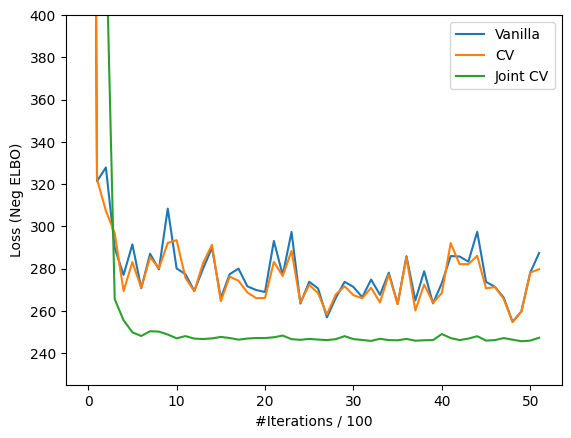

In [36]:
plt.plot(losses, label='Vanilla')
plt.plot(lossesCV, label='CV')
plt.plot(lossesJointCV, label='Joint CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
plt.ylim(top=400, bottom=225)

In [37]:
# Naive estimator
runner = SVI(
    model_dir='models/LogisticRegression',
    dataset='sonar',
    observed_vars=['X', 'y']
)
_, losses, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, opt='sgd')

# CV estimator
runner = SVI_CV(
    model_dir='models/LogisticRegression',
    dataset='sonar',
    observed_vars=['X', 'y']
)
_, lossesCV, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, opt='sgd')

In [38]:
# JointCV estimator
runner = SVI_Joint_CV(
    model_dir='models/LogisticRegression',
    dataset='sonar',
    observed_vars=['X', 'y']
)
_, lossesJointCV, _ = runner.run(num_iters=num_iters, step_size=step_size, batch_size=batch_size, alpha_decay=True, opt='sgd')

(100.0, 400.0)

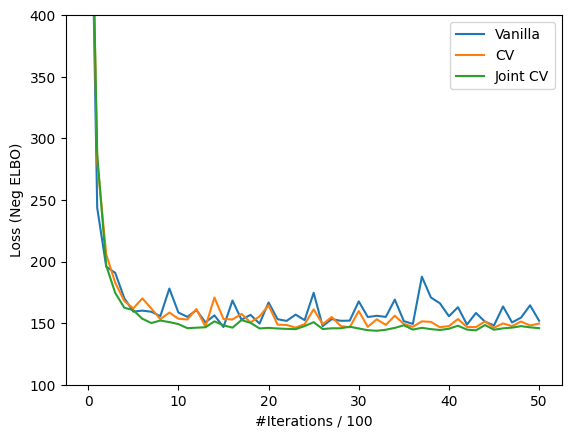

In [39]:
plt.plot(losses, label='Vanilla')
plt.plot(lossesCV, label='CV')
plt.plot(lossesJointCV, label='Joint CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
plt.ylim(top=400, bottom=100)

## MovieLens (subset)

In [40]:
# Have a peek of the data
data_tiny = np.load('models/MovieLens/tiny.npz')
print("Tiny subset size:", data_tiny['X'].shape)

data_full = np.load('models/MovieLens/full.npz')
print("Full dataset size:", data_full['X'].shape)

Tiny subset size: (500, 18)
Full dataset size: (100000, 18)


In [41]:
# Naive estimator
runner = SVI(
    model_dir='models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, losses, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

# CV estimator
runner = SVI_CV(
    model_dir='models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, lossesCV, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

In [42]:
# Joint CV estimator
runner = SVI_Joint_CV(
    model_dir='models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, lossesJointCV, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, alpha_decay=True, opt='adam')

(1280.0, 1400.0)

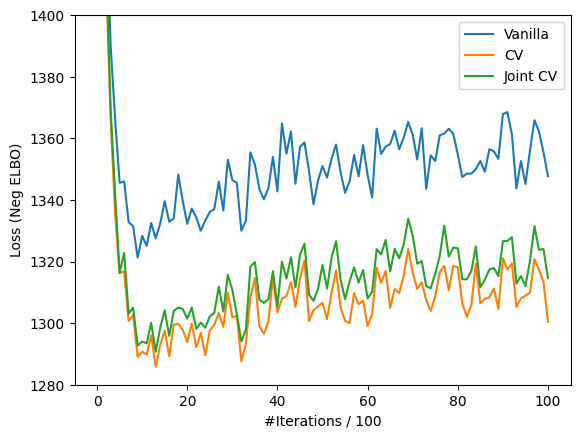

In [43]:
plt.plot(losses, label='Vanilla')
plt.plot(lossesCV, label='CV')
plt.plot(lossesJointCV, label='Joint CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
plt.ylim(top=1400, bottom=1280)